In [3]:
import pandas as pd


In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv')

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [72]:
x = data[['CO','NOX']] #variable independiente
y = data['PM10']  #variable dependiente

In [17]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [74]:
split_index = int ( len(data) * 0.8)

In [76]:
x_train = x.iloc[:split_index] #de la variable CO escoje del valor 0 hasta el valor index que es el 80 % de los datos
x_test = x.iloc[split_index:] 
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [78]:
from sklearn.linear_model import LinearRegression

In [80]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [82]:
y_pred = model.predict(x_test)

In [84]:
coeficientes = pd.DataFrame({
    'Variables':x.columns,
    'Coeficientes':model.coef_
})

In [86]:
print (coeficientes) #Beta uno

  Variables  Coeficientes
0        CO      -4.42238
1       NOX       0.74793


In [88]:
print (f"Intercepto:{model.intercept_}") #Beta cero

Intercepto:15.39405031655707


In [90]:
from  sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [92]:
r2 = r2_score(y_test,y_pred)

In [94]:
r2

0.4051483156923722

In [96]:
rnse = mean_squared_error(y_test,y_pred, squared=False) #False para que no se eleve al cuadrado

In [98]:
rnse

11.015555045398493

In [100]:
mae = mean_absolute_error(y_test,y_pred)

In [102]:
mae

8.77187127970108

In [104]:
y_pred

array([35.84322788, 35.16986591, 27.93741429, 36.63817377, 41.13384142,
       41.06242395, 42.75638277, 44.17721444, 41.37719193, 25.82155189,
       29.04508134, 29.73548446, 32.63938451, 33.26152794, 37.54453601,
       31.04669963, 32.62612718, 42.79223458, 44.49395668, 46.49808759,
       44.54137796, 39.69857864, 29.54418195, 25.75107461, 40.48770376,
       43.21548707, 40.28825791, 30.60020619, 33.59204026, 36.88470139,
       31.9400362 , 51.05169762, 46.68372588, 40.86591425, 49.42332902,
       46.26082727, 47.17695499, 39.32150203, 41.74288829, 41.65078904,
       54.44211195, 48.85309131, 43.87679743, 44.1830246 , 33.8194889 ,
       42.91702292, 44.68183935, 50.51921234, 46.307285  , 41.39198454,
       32.1379949 , 31.89452241, 35.88945277, 54.38695419, 53.14398519,
       50.37495549, 33.42907716, 37.13424237, 35.02935838, 33.6375235 ,
       34.46112397, 47.26249987, 48.58843081, 35.47889646, 49.67038674,
       39.44255202, 39.29978144, 53.18432663, 51.63623227, 49.73

In [56]:
import matplotlib.pyplot as plt

In [106]:
residuos = y_test - y_pred

Text(0, 0.5, 'Frecuencia')

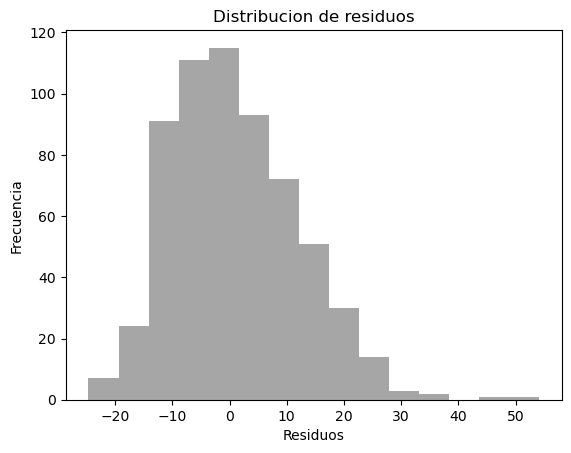

In [108]:
plt.hist(residuos, bins=15, color='gray', alpha= 0.7)
plt.title('Distribucion de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

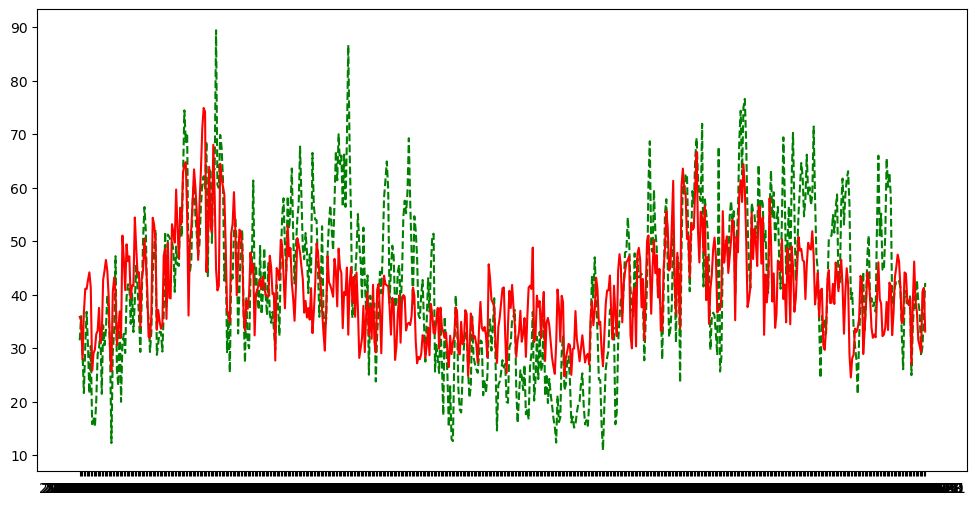

In [110]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'],y_test,linestyle='--',color='green')
plt.plot(data.iloc[split_index:]['fecha'],y_pred,linestyle='-',color='red')

### Random Forest
##### Hiperparametros.
###### max_depth: profundidad maxima de los arboles.
###### n_estimators: numero de arboles en el bosque.
###### random_state: semilla para generar numeros aleatorios, utilizados para garantizar la reproducibidad de los resultados.

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [122]:
data=data.sort_values(by='fecha')
split_index=int(len(data)*0.8)
x_train=x.iloc[:split_index]
x_test=x.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [132]:
rf_model = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42) #hiperparametros se ajustan conforme a la prediccion
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [134]:
y_pred = rf_model.predict(x_test)

In [136]:
y_pred

array([37.24892263, 35.32057419, 26.70869673, 36.37776162, 44.41395045,
       43.49919545, 42.98372425, 42.69844873, 39.57604419, 26.67875154,
       26.55087714, 28.77840474, 32.87200417, 32.75169265, 36.72291327,
       33.25297804, 32.66688409, 40.71421075, 46.30053156, 49.56032486,
       47.67585882, 39.82821852, 26.03302551, 25.42007528, 38.88856365,
       47.21158059, 39.9460854 , 29.81966653, 33.08362745, 37.21321015,
       32.5663384 , 51.61349095, 49.38688847, 43.59413809, 46.52989591,
       46.39869723, 49.4710694 , 36.45366213, 44.61345559, 45.92196662,
       52.81024354, 50.37387558, 47.39029739, 47.23559944, 33.143571  ,
       47.28105196, 47.16855492, 51.54336244, 49.79972121, 45.57518006,
       33.15509461, 32.95883562, 35.18507686, 52.76839218, 52.39216581,
       51.5216483 , 33.29030199, 37.97353234, 34.67817013, 33.0404903 ,
       34.27427012, 48.58212923, 46.67872903, 34.37881992, 53.47290053,
       35.959863  , 35.57362219, 52.4469451 , 51.69927658, 49.95

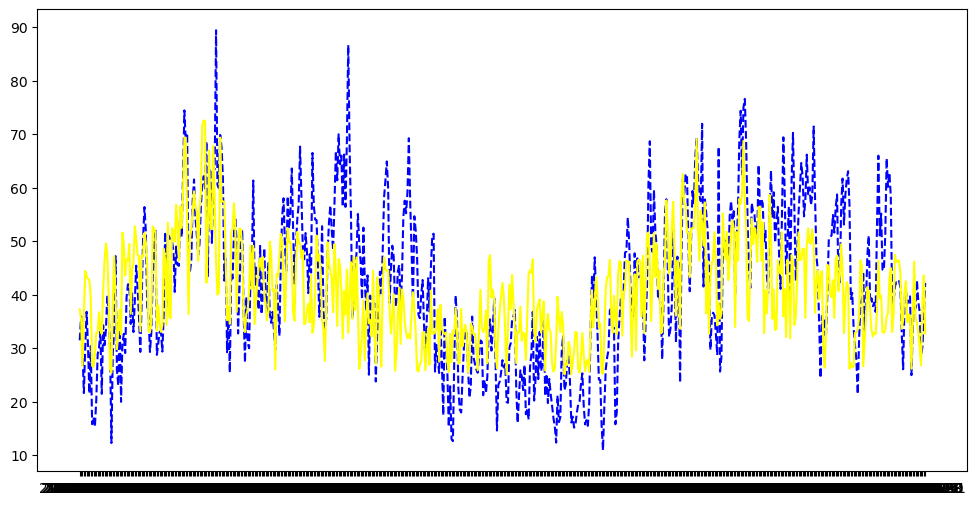

In [140]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'],y_test,linestyle='--',color='blue')
plt.plot(data.iloc[split_index:]['fecha'],y_pred,linestyle='-',color='yellow')